In [1]:
import os
os.chdir(os.path.abspath('..'))

In [2]:
import json, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

import src.utils as utils
import src.preprocess_lib as preprocess_lib
import src.experiment_lib as experiment_lib

In [9]:
# config_dir = 'runs/autoregressive_forecast/gipuzkoa_subset_30'
config_dir = 'runs/imputation_forecast/gipuzkoa'
sub_folder = 'forecasting_results_24'
config_file = 'config.json'

In [10]:
df_experiment = experiment_lib.collect_results(config_dir, config_file, sub_folder=sub_folder)

In [11]:
df_experiment = experiment_lib.rename_columns(df_experiment)

In [12]:
df_experiment = experiment_lib.add_columns(df_experiment)

In [13]:
df_experiment[["model_folder", "Log-Likelihood (Test)"]]
# df_experiment['val_loglikelihood']

,model_folder,Log-Likelihood (Test)
0,sweep_Mar26_05-27-55,-35.692169
1,sweep_Mar26_01-36-14,-33.993896
2,sweep_Mar26_00-50-46,-56.488243
3,sweep_Mar26_03-33-49,-35.757843
4,sweep_Mar25_23-01-27,-135.026321
5,sweep_Mar26_11-03-30,-40.857410
6,sweep_Mar26_06-36-33,-75.969513
7,sweep_Mar26_04-37-52,-89.743294
8,sweep_Mar26_12-01-37,-53.408890
9,sweep_Mar26_02-40-40,-58.795906


## Visualization

In [14]:
sns.set_theme(style="whitegrid", font='serif')
sns.set_context("paper", font_scale=1.0)

In [15]:
save_dir = 'transfer/test_results_viz'

### Number of Topics effect

In [16]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (df_experiment["Availability Rate (b)"] != None) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (np.isin(df_experiment["Number of LDA Clusters"], [0, 100, 200, 500, 1000, 2000, 10000])) & \
                (df_experiment["Dropout"] == True) & \
                (df_experiment["Number of Layers"] == 2) & \
                (df_experiment["Number of Neurons"] == 1000) & \
                (df_experiment["Pattern Dictionary Size"] != None) & \
                (df_experiment["train_lr_scheduling_kwargs_min_lr"] != None) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [0, 100, 125, 150, 200, 250, 300, 375, 450])) & \
                (df_experiment["data_user_embedding_kwargs_model_kwargs_reduce_dim"] != None) & \
                (df_experiment["data_random_seed"] == 2112)

In [17]:
df_experiment[filter_arr][["model_folder", "Number of LDA Topics", "Conditions", "Pattern Dictionary Size"]]

,model_folder,Number of LDA Topics,Conditions,Pattern Dictionary Size
0,sweep_Mar26_05-27-55,100,"[""months"", ""weekdays"", ""users""]",100
1,sweep_Mar26_01-36-14,20,"[""months"", ""weekdays"", ""users""]",100
2,sweep_Mar26_00-50-46,10,"[""months"", ""weekdays"", ""users""]",0
3,sweep_Mar26_03-33-49,50,"[""months"", ""weekdays"", ""users""]",100
4,sweep_Mar25_23-01-27,5,"[""months"", ""weekdays"", ""users""]",0
5,sweep_Mar26_11-03-30,0,"[""months"", ""weekdays""]",100
6,sweep_Mar26_06-36-33,100,"[""months"", ""weekdays"", ""users""]",0
7,sweep_Mar26_04-37-52,50,"[""months"", ""weekdays"", ""users""]",0
8,sweep_Mar26_12-01-37,10,"[""months"", ""weekdays"", ""users""]",100
9,sweep_Mar26_02-40-40,20,"[""months"", ""weekdays"", ""users""]",0


In [18]:
relplot_kwargs = {  
                    'data': df_experiment[filter_arr],
                    'x': 'Number of LDA Topics',
                    'hue': "Pattern Dictionary Size",
                    'style': "User-Informed",
                    'alpha': 1.0,
                    "s": 800,
                }

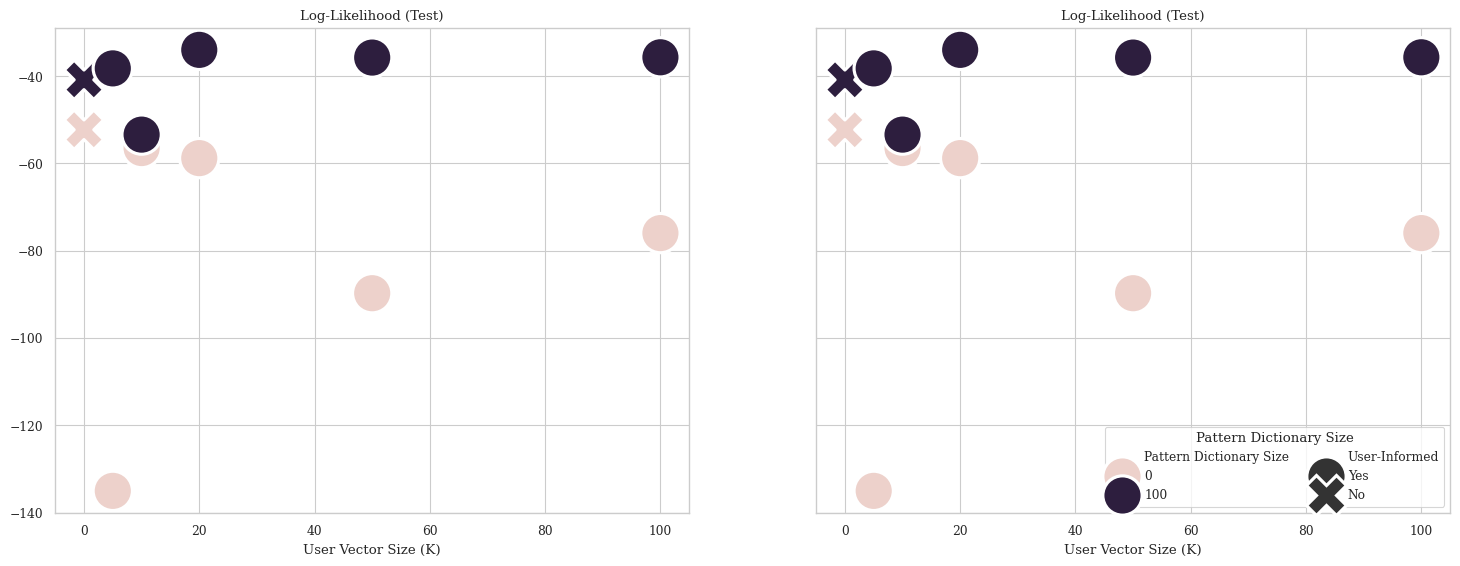

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20*0.9, 7*0.9))


h0 = sns.scatterplot(y="Log-Likelihood (Test)",
                **relplot_kwargs, ax=ax[0])

h1 = sns.scatterplot(y="Log-Likelihood (Test)",
                **relplot_kwargs, ax=ax[1])
# h1 = sns.scatterplot(y="Log-Likelihood (Missing)",
#                 **relplot_kwargs, ax=ax[1])

ax[0].set_title(ax[0].get_ylabel())
ax[1].set_title(ax[1].get_ylabel())

ax[0].set_xlabel('User Vector Size (K)')
ax[1].set_xlabel('User Vector Size (K)')

## share same y-axis
ax[0].set_ylabel('')
ax[1].set_ylabel('')

## remove y tick labels
ax[1].set_yticklabels([])


## same ylim for both plots
# ax[0].set_ylim(120, 135)
# ax[1].set_ylim(-10, -1.5)

#remove legend
h0.legend_.remove()
h1.legend(ncol=2, loc='lower right', title=relplot_kwargs['hue'])

# if os.path.exists(save_dir): 
#     plt.savefig(os.path.join(save_dir, f'{relplot_kwargs["x"]}.png'), bbox_inches='tight', dpi=300)

### Number of LDA clusters effect

In [22]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (np.isin(df_experiment["Number of LDA Topics"], [0, 20, 50, 100])) & \
                (df_experiment["Availability Rate (b)"] != None) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (df_experiment["Dropout"] == False) & \
                (df_experiment["Number of Layers"] == 2) & \
                (df_experiment["Number of Neurons"] == 1000) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [0, 125, 250, 375])) &\
                (df_experiment["data_random_seed"] == 2112) 

In [23]:
relplot_kwargs = {  
                    'data': df_experiment[filter_arr],
                    'x': "Number of LDA Clusters",
                    # 'hue': "Number of LDA Topics",
                    'alpha': 1.0,
                    # 's': 300,
                }

[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

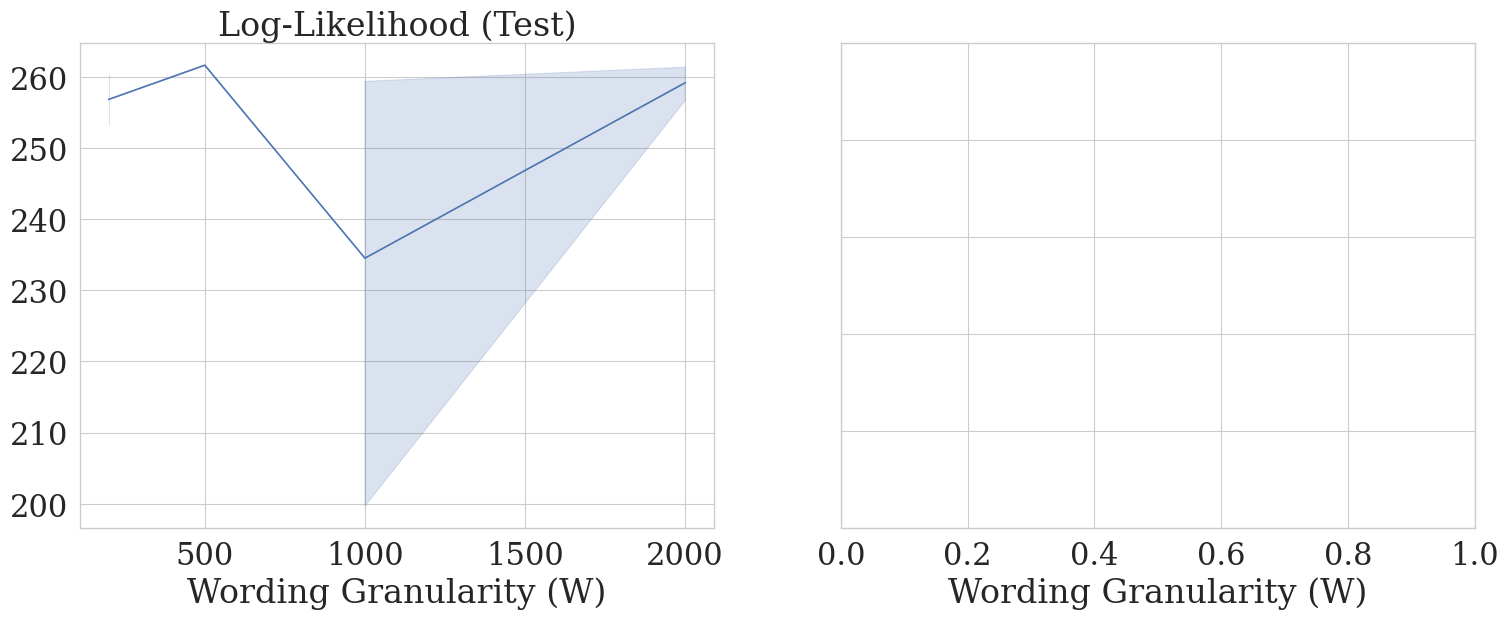

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20*0.9, 7*0.9))


h0 = sns.lineplot(y="Log-Likelihood (Test)",
                **relplot_kwargs, ax=ax[0])

# h1 = sns.scatterplot(y="Log-Likelihood (Missing)",
#                 **relplot_kwargs, ax=ax[1])

ax[0].set_title(ax[0].get_ylabel())
ax[1].set_title(ax[1].get_ylabel())

ax[0].set_xlabel('Wording Granularity (W)')
ax[1].set_xlabel('Wording Granularity (W)')

## share same y-axis
ax[0].set_ylabel('')
ax[1].set_ylabel('')

## remove y tick labels
ax[1].set_yticklabels([])


## same ylim for both plots
# ax[0].set_ylim(-10, -1.5)
# ax[1].set_ylim(-10, -1.5)

#remove legend
# h0.legend_.remove()
# h1.legend(ncol=2, loc='lower right', title=relplot_kwargs['hue'])

# if os.path.exists(save_dir): 
#     plt.savefig(os.path.join(save_dir, f'{relplot_kwargs["x"]}.png'), bbox_inches='tight', dpi=300)

### Pattern Dictionary size effect

In [69]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (np.isin(df_experiment["Number of LDA Topics"], [0, 20, 50, 100])) & \
                (df_experiment["Availability Rate (b)"] != None) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (df_experiment["Dropout"] == False) & \
                (df_experiment["Number of Layers"] == 2) & \
                (df_experiment["Number of Neurons"] == 1000) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [0, 125, 250, 375])) &\
                (df_experiment["data_random_seed"] == 2112) 

In [70]:
df_experiment_filtered = df_experiment[filter_arr]
# df_experiment_filtered = df_experiment_filtered.drop(df_experiment_filtered[(df_experiment_filtered["epsilon"] != 1e-5) & (df_experiment_filtered["Pattern Dictionary Size"]==0)].index)

In [83]:
relplot_kwargs = {  
                    'data': df_experiment_filtered.sort_values(by=["epsilon"], ascending=False),
                    'x': "Pattern Dictionary Size",
                    # 'size': "epsilon",
                    'hue': "User-Informed",
                    'alpha': 1.0,
                    # 's': 300,
                    # 'sizes': (np.array([50, 100, 200])*3).tolist(),
                    # 'hue_order': ["Yes", "No"],
                }

[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

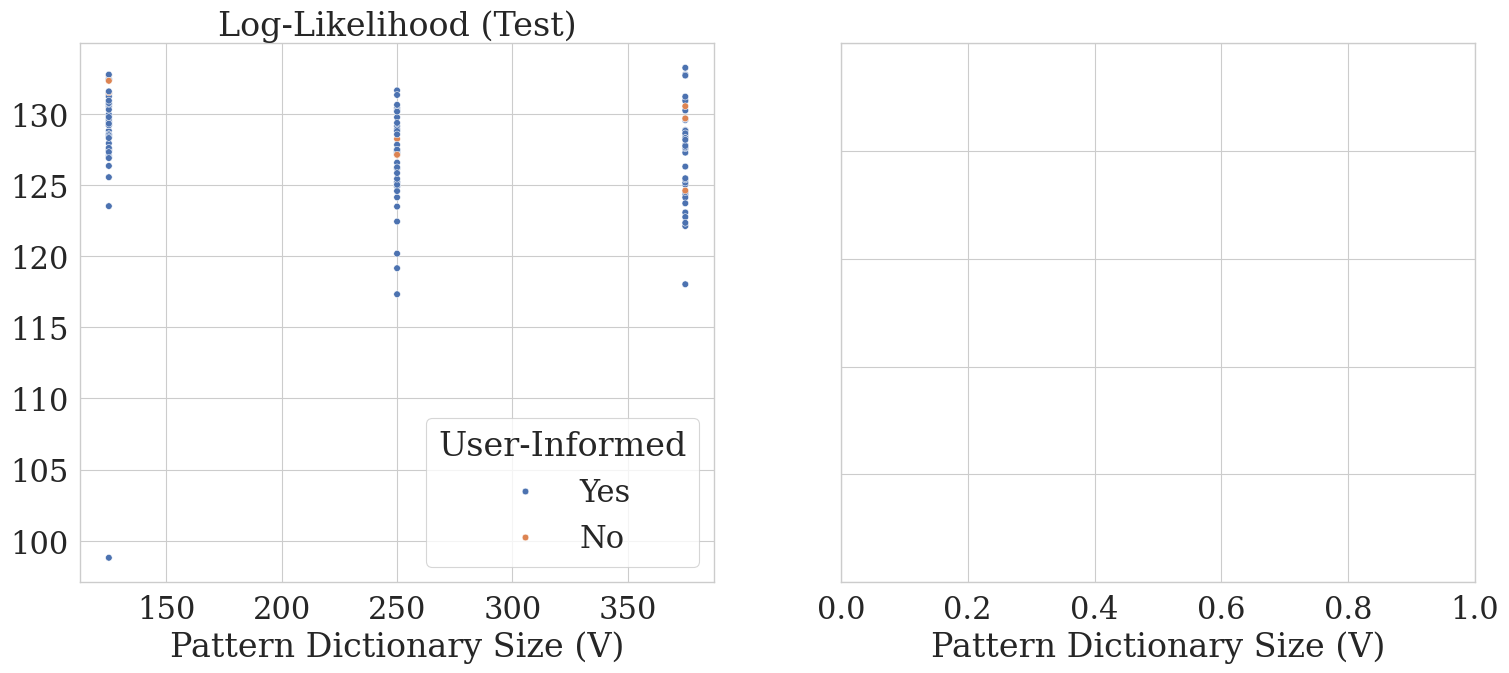

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(20*0.9, 7*1.0))


h0 = sns.scatterplot(y="Log-Likelihood (Test)",
                **relplot_kwargs, ax=ax[0])

# h1 = sns.scatterplot(y="Log-Likelihood (Missing)",
#                 **relplot_kwargs, ax=ax[1])

ax[0].set_title(ax[0].get_ylabel())
ax[1].set_title(ax[1].get_ylabel())

## share same y-axis
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].set_xlabel('Pattern Dictionary Size (V)')
ax[1].set_xlabel('Pattern Dictionary Size (V)')

## remove y tick labels
ax[1].set_yticklabels([])


## same ylim for both plots
# ax[0].set_ylim(-10, -1.5)
# ax[1].set_ylim(-10, -1.5)

#remove legend
# h0.legend_.remove()
# h1.legend(ncol=2, loc='lower right', title='User-Informed')
# h1.legend(ncol=7, loc='lower center', bbox_to_anchor=(-0.15, -0.4), handlelength=1)

# import matplotlib.ticker as mticker

# formatter = mticker.FuncFormatter(lambda x, _: f'{x:.0e}')
# handles, labels = h0.legend_.legend_handles, h0.legend_.get_texts()

# for label in labels:
#     try:
#         val = float(label.get_text())
#         label.set_text(formatter(val, None))
#     except ValueError: pass

# labels[-4].set_text(r'$\epsilon$')

# if os.path.exists(save_dir):
#     plt.savefig(os.path.join(save_dir, f'{relplot_kwargs["x"]}.png'), bbox_inches='tight', dpi=300)

### Amputation rate effect

In [ ]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (np.isin(df_experiment["Number of LDA Topics"], [0, 100])) & \
                (df_experiment["Availability Rate (b)"] != 1) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (np.isin(df_experiment["Number of LDA Clusters"], [0, 1000])) & \
                (df_experiment["Dropout"] == False) & \
                (df_experiment["Number of Layers"] == 2) & \
                (df_experiment["Number of Neurons"] == 1000) & \
                (df_experiment["Pattern Dictionary Size"] != None) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [0, 100])) &\
                (df_experiment["data_random_seed"] != None) & \
                (df_experiment["epsilon"] == 1e-4)

In [ ]:
relplot_kwargs = {  
                    'data': df_experiment[filter_arr],
                    'x': "Expected Missing Days",
                    'hue': "User-Informed",
                    'style': "Covariance Structure",
                    'alpha': 0.8,
                    's': 300,
                    'hue_order': ['Yes', 'No'],
                }

ValueError: Could not interpret value `Log-Likelihood (Missing)` for `y`. An entry with this name does not appear in `data`.

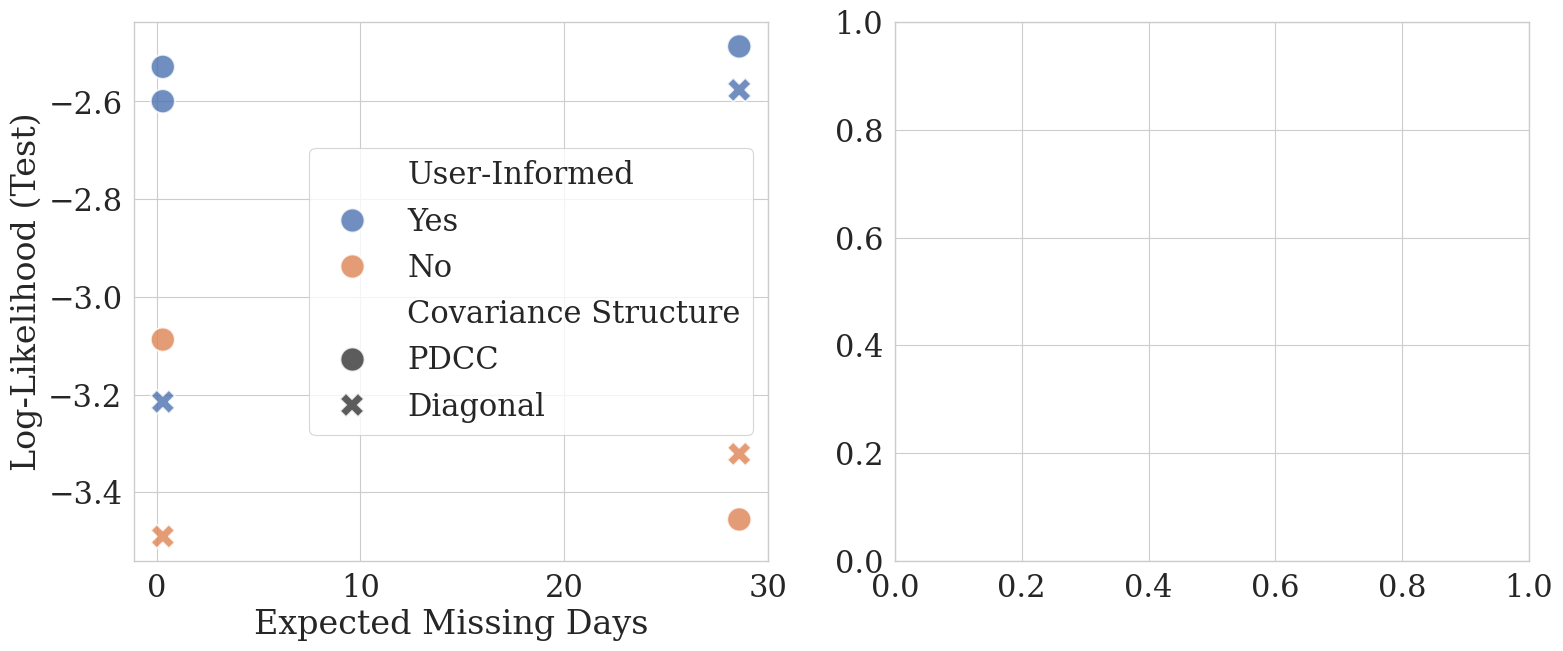

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20*0.9, 7*1.0))


h0 = sns.scatterplot(y="Log-Likelihood (Test)",
                **relplot_kwargs, ax=ax[0])

h1 = sns.scatterplot(y="Log-Likelihood (Missing)",
                **relplot_kwargs, ax=ax[1])

ax[0].set_title(ax[0].get_ylabel())
ax[1].set_title(ax[1].get_ylabel())

## share same y-axis
ax[0].set_ylabel('')
ax[1].set_ylabel('')

## remove y tick labels
ax[1].set_yticklabels([])


## same ylim for both plots
ax[0].set_ylim(-10, -1.5)
ax[1].set_ylim(-10, -1.5)

#remove legend
h0.legend_.remove()
h1.legend(ncol=6, loc='lower center', bbox_to_anchor=(-0.15, -0.4), handlelength=1)

if os.path.exists(save_dir): 
    plt.savefig(os.path.join(save_dir, f'{relplot_kwargs["x"]}.png'), bbox_inches='tight', dpi=300)

In [ ]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (np.isin(df_experiment["Number of LDA Topics"], [0, 100])) & \
                (df_experiment["Availability Rate (b)"] == 10) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (np.isin(df_experiment["Number of LDA Clusters"], [0, 1000])) & \
                (df_experiment["Dropout"] == False) & \
                (df_experiment["Pattern Dictionary Size"] != None) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [100])) & \
                (df_experiment["data_random_seed"] == 2112) & \
                (df_experiment["epsilon"] == 1e-4)

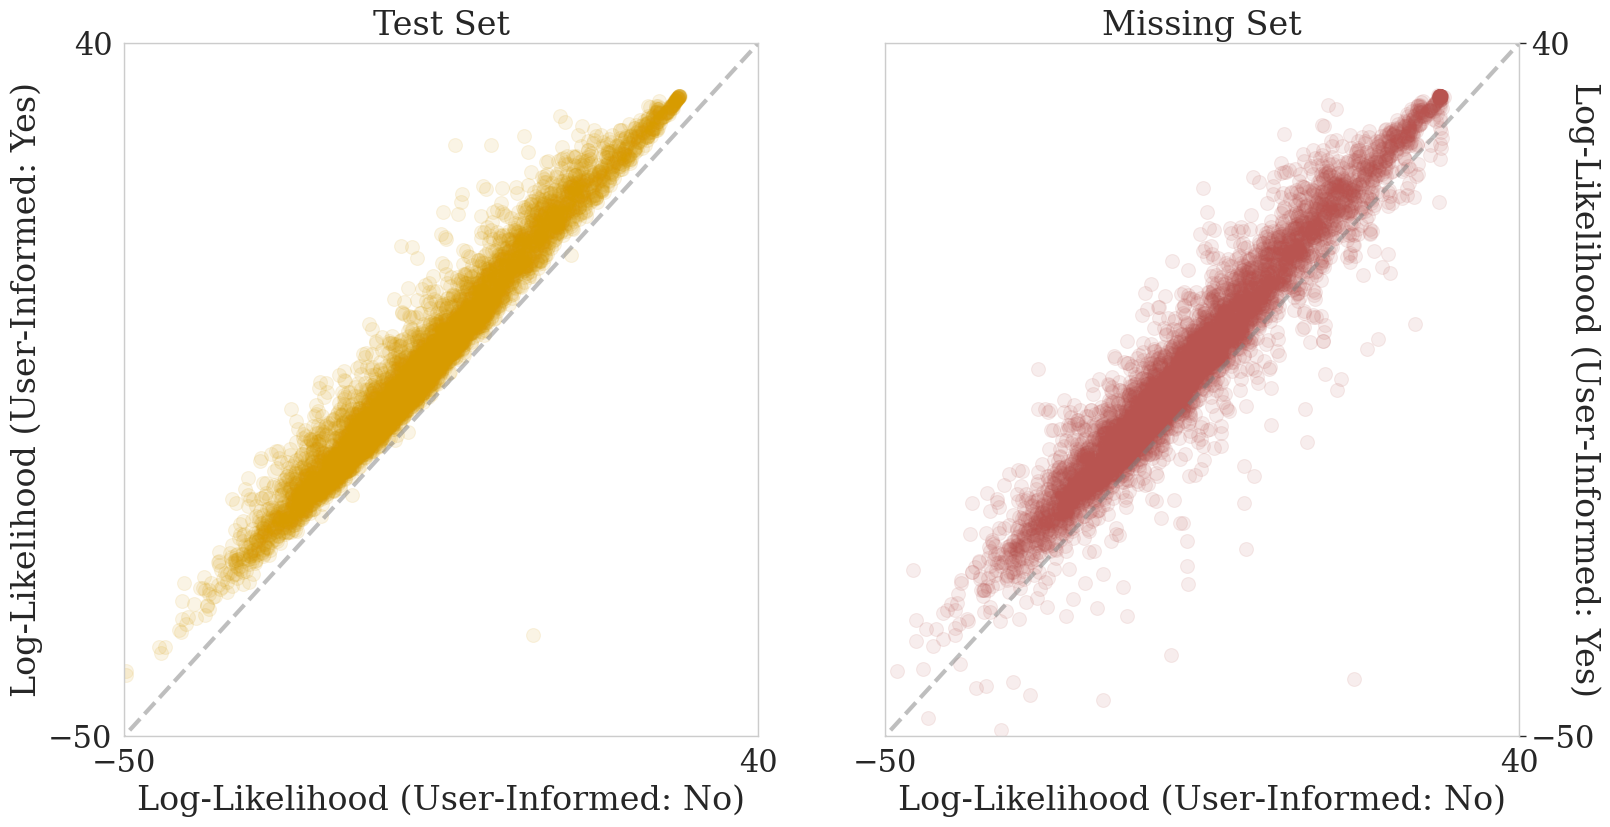

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))
# fig.tight_layout()

h0 = ax[0].plot([-100, 100], [-100, 100], color='tab:grey', linestyle='--', alpha=0.5, lw=3)
h1 = ax[1].plot([-100, 100], [-100, 100], color='tab:grey', linestyle='--', alpha=0.5, lw=3)

ax[0].scatter(df_experiment[filter_arr]["test_users"].iloc[0], df_experiment[filter_arr]["test_users"].iloc[1], alpha=0.1, s=100, color='#D79B00')
# sns.jointplot(x=df_experiment[filter_arr]["test_users"].iloc[0], y=df_experiment[filter_arr]["test_users"].iloc[1], ax=ax[0])
ax[1].scatter(df_experiment[filter_arr]["missing_users"].iloc[0], df_experiment[filter_arr]["missing_users"].iloc[1], alpha=0.1, s=100, c='#B85450')
ax[0].set_xlim(-50, 40)
ax[0].set_ylim(-50, 40)
ax[1].set_xlim(-50, 40)
ax[1].set_ylim(-50, 40)

ax[0].set_yticks([-50, 40])
ax[0].set_xticks([-50, 40])
ax[1].set_yticks([-50, 40])
ax[1].set_xticks([-50, 40])
# ax[1].set_yticklabels([])
ax[1].yaxis.set_label_position("right")
# ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()

ax[0].set_ylabel("Log-Likelihood (User-Informed: Yes)")
ax[1].set_ylabel("Log-Likelihood (User-Informed: Yes)", rotation=270)
ax[0].set_xlabel("Log-Likelihood (User-Informed: No)")
ax[1].set_xlabel("Log-Likelihood (User-Informed: No)")

ax[0].set_title("Test Set")
ax[1].set_title("Missing Set")

if os.path.exists(save_dir): 
    plt.savefig(os.path.join(save_dir, f'likelihood_gain_scatter.png'), bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
df_experiment[filter_arr]["model_folder"].iloc[0]

'sweep_Sep10_07-34-10'

In [ ]:
df_test_raw = pd.read_csv(f'runs/sweep_runs_corrected/{df_experiment[filter_arr]["model_folder"].iloc[0]}/test_results_raw.csv')

In [ ]:
df_test_raw["set_type"] = df_test_raw["set_type"].astype('category')

In [ ]:
df_test_raw.iloc[df_test_raw["loglikelihood"].argmax()]

loglikelihood    34.553925
user_id                894
month                    6
set_type           missing
Name: 944082, dtype: object

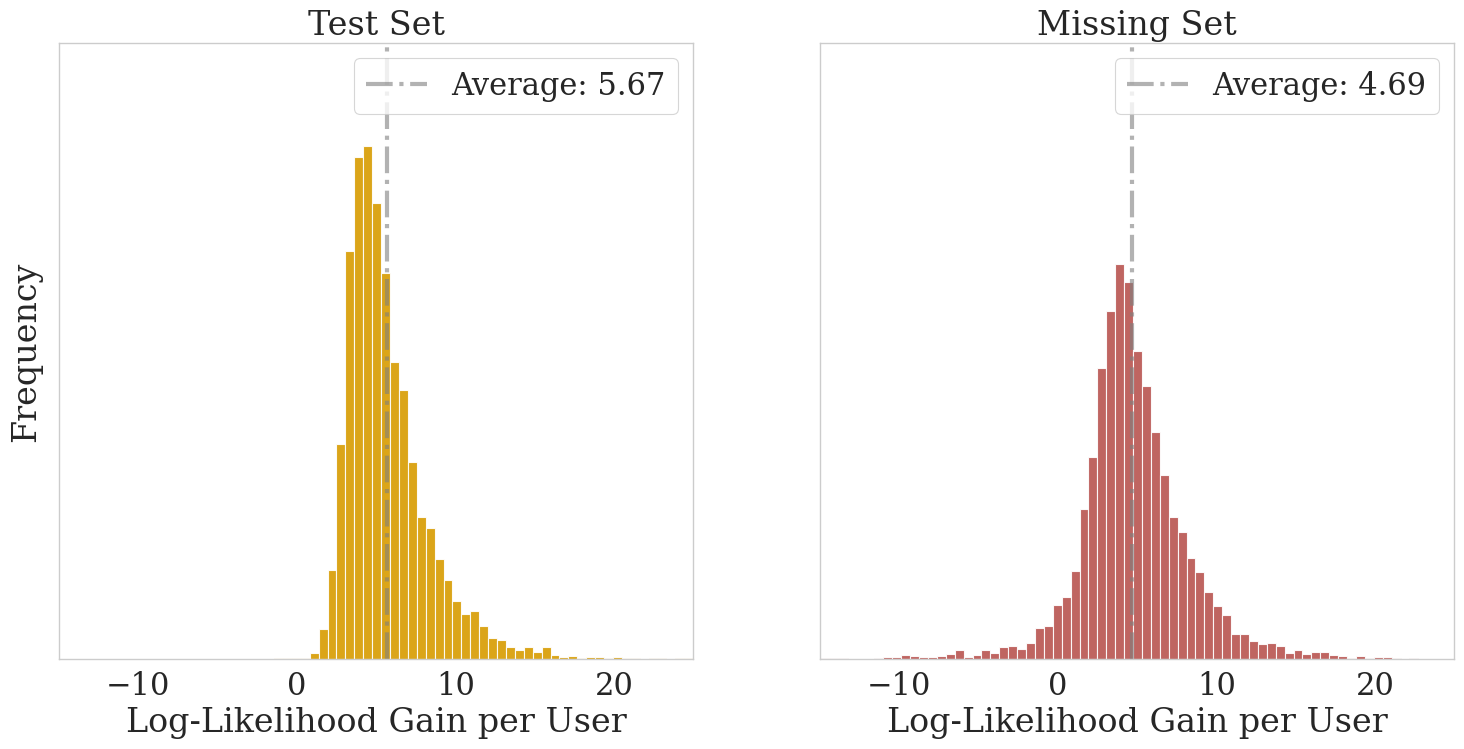

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].plot([(df_experiment[filter_arr]["test_users"].iloc[1] - df_experiment[filter_arr]["test_users"].iloc[0]).mean()]*2, [0,20000], 
           color='tab:grey', 
           lw=3,
           label=f'Average: {(df_experiment[filter_arr]["test_users"].iloc[1] - df_experiment[filter_arr]["test_users"].iloc[0]).mean():.2f}',
           alpha=0.6,
           linestyle='-.')
ax[1].plot([(df_experiment[filter_arr]["missing_users"].iloc[1] - df_experiment[filter_arr]["missing_users"].iloc[0]).mean()]*2, [0,20000], 
           color='tab:grey', 
           lw=3,
           label=f'Average: {(df_experiment[filter_arr]["missing_users"].iloc[1] - df_experiment[filter_arr]["missing_users"].iloc[0]).mean():.2f}',
           alpha=0.6,
           linestyle='-.')

h0 = ax[0].hist(df_experiment[filter_arr]["test_users"].iloc[1] - df_experiment[filter_arr]["test_users"].iloc[0], 
                range=(-20, 25), 
                bins=80, 
                color='#D79B00',
                alpha=0.9)
h1 = ax[1].hist(df_experiment[filter_arr]["missing_users"].iloc[1] - df_experiment[filter_arr]["missing_users"].iloc[0], 
                range=(-20, 25), 
                bins=80, 
                color='#B85450',
                alpha=0.9)

ax[0].set_xlim(-15, 25)
ax[1].set_xlim(-15, 25)

ax[0].set_ylim(0, np.max([h0[0], h1[0]])*1.2)
ax[1].set_ylim(0, np.max([h0[0], h1[0]])*1.2)

ax[0].set_xticks([-10, 0, 10, 20])
ax[1].set_xticks([-10, 0, 10, 20])

ax[0].set_yticklabels([])
ax[1].set_yticklabels([])

ax[0].set_title("Test Set")
ax[1].set_title("Missing Set")

ax[0].set_xlabel("Log-Likelihood Gain per User")
ax[1].set_xlabel("Log-Likelihood Gain per User")

ax[0].set_ylabel("Frequency")

ax[0].grid(False)
ax[1].grid(False)

ax[0].legend()
ax[1].legend()

if os.path.exists(save_dir): 
    plt.savefig(os.path.join(save_dir, f'likelihood_gain_histogram.png'), bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
filter_arr =    (df_experiment["Number of LDA Topics"] != None) & \
                (np.isin(df_experiment["Number of LDA Topics"], [0, 100])) & \
                (df_experiment["Availability Rate (b)"] == 50) & \
                (df_experiment["Beta"] == 1.0) & \
                (df_experiment["Likelihood Distribution"] != None) & \
                (df_experiment["Number of LDA Clusters"] != None) & \
                (np.isin(df_experiment["Number of LDA Clusters"], [0, 1000])) & \
                (df_experiment["Dropout"] != None) & \
                (df_experiment["Conditions"] != None) & \
                (df_experiment["Number of Layers"] == 2) & \
                (df_experiment["Number of Neurons"] == 1000) & \
                (df_experiment["Pattern Dictionary Size"] != None) & \
                (np.isin(df_experiment["Pattern Dictionary Size"], [0, 25])) &\
                (df_experiment["model_distribution_dict_likelihood_sigma_lim"] == 1e-4)

In [ ]:
monthly_scores = [ scores.tolist() for scores in df_experiment[filter_arr]["val_months"].values.tolist()]

In [ ]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

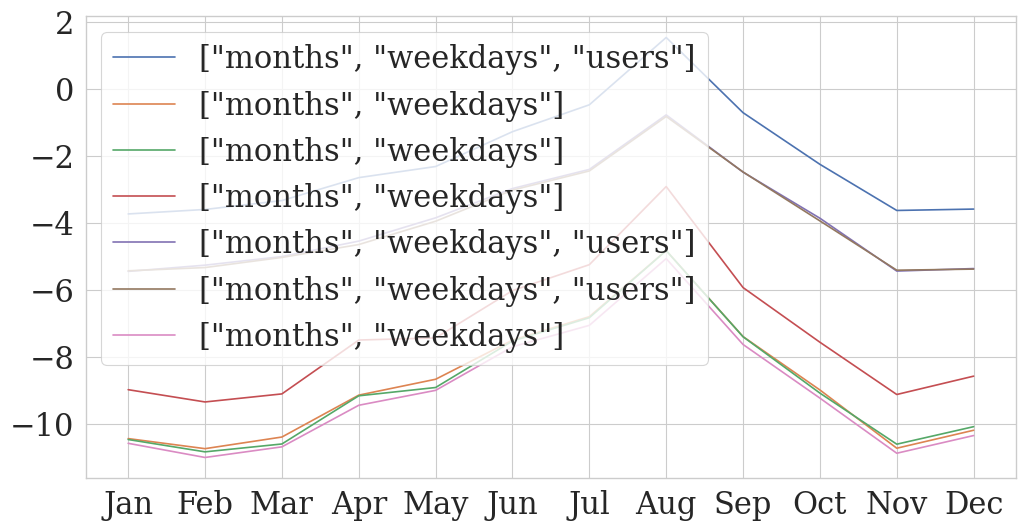

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, scores in enumerate(monthly_scores):
    plt.plot(scores, label=df_experiment[filter_arr]["Conditions"].values[i])
plt.xticks(range(12), month_names)
plt.legend()
plt.show()

In [ ]:
circular_transformer = utils.CircularTransformer(max_conds=12, min_conds=1)

In [ ]:
month_encodings = circular_transformer.transform(np.arange(1, 13)[:,None])
month_encodings = np.concatenate([month_encodings, month_encodings[[0],:]], axis=0)

In [ ]:
monthly_scores_ = np.array(monthly_scores)
monthly_scores_ = np.concatenate([monthly_scores_, monthly_scores_[:,[0]]], axis=1)


In [ ]:
eps = 1e-2
monthly_scores_ = (monthly_scores_ - np.min(monthly_scores_) + eps) / ( np.max(monthly_scores_) - np.min(monthly_scores_) + eps) 


In [ ]:
monthly_scores_.max()

1.0

[]

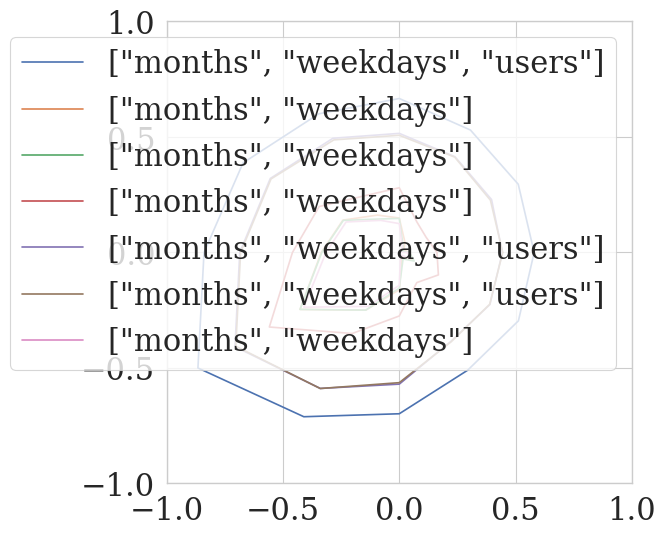

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

for i, scores in enumerate(monthly_scores_):
    plt.plot(month_encodings[:,0]*scores, month_encodings[:,1]*scores,
              label=df_experiment[filter_arr]["Conditions"].values[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.plot()

In [ ]:
ss_rate = 1
user_scores = [ scores.tolist()[::ss_rate] for scores in df_experiment[filter_arr]["missing_users"].values.tolist()]

In [ ]:
sort_idx = np.argsort(user_scores[0])

ValueError: x and y must be the same size

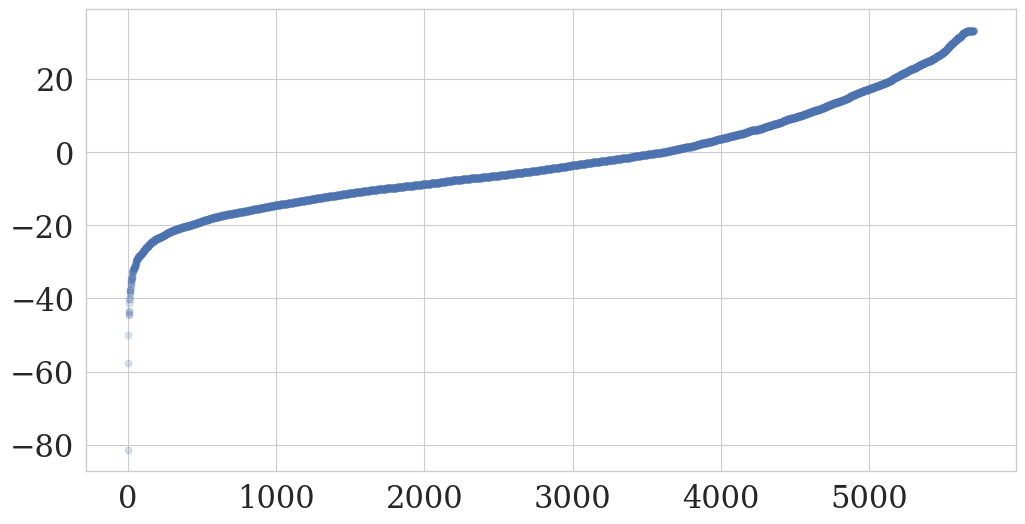

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, scores in enumerate(user_scores):
    plt.scatter(np.arange(len(scores)), np.array(scores)[[sort_idx]], label=df_experiment[filter_arr]["Conditions"].values[i], alpha=0.2)
plt.legend()
plt.show()